#  Best pair search

Explorando 20 rodadas de classificação com `KNN` e `SVC` para cada combinação de canais

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Carregando dados

In [2]:
chb12_com_dwt_df = pd.read_csv('./chb12dwt.csv')
target_com_dwt_s = chb12_com_dwt_df.pop('target')

y = target_com_dwt_s.values

# agrupa todas colunas pelo mesmo número do canal
canais_com_dwt_agrupados_por_numero = []
for i in range(18):
    canais_com_dwt_agrupados_por_numero.append(
        [column for column in chb12_com_dwt_df.columns if f'{i}' in column.split('-')]
    )

seed_array = np.random.randint(0, 8000, 20)
print(f'seeds: {seed_array}')

seeds: [ 961 4543  468 6138 4978 5518 5074 6507 3675 2513  476 1537 3432 2983
 2744 5020  299 7348 6300 3087]


## `KNN`

Para o `KNN` com este dataframe, o classificador obteve melhor resultado com o canal **14**

In [3]:
knn_com_dwt_df = pd.DataFrame()

for channel_number, channel_columns in enumerate(canais_com_dwt_agrupados_por_numero):
    channel_acc = []

    if channel_number != 14:
        colunas = channel_columns + canais_com_dwt_agrupados_por_numero[14]
    else:
        colunas = canais_com_dwt_agrupados_por_numero[14]
    
    # X recebe apenas as colunas relacionadas ao canal respectivo à iteração
    X = chb12_com_dwt_df[colunas].values
    
    for seed in seed_array:
        # Separando dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Instanciando classificador
        classifier = KNeighborsClassifier().fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    knn_com_dwt_df[f'14-{channel_number}'] = channel_acc

knn_com_dwt_df

,14-0,14-1,14-2,14-3,14-4,14-5,14-6,14-7,14-8,14-9,14-10,14-11,14-12,14-13,14-14,14-15,14-16,14-17
0,0.909091,0.905594,0.919580,0.937063,0.874126,0.930070,0.909091,0.912587,0.898601,0.909091,0.940559,0.891608,0.905594,0.916084,0.940559,0.898601,0.926573,0.884615
1,0.912587,0.909091,0.937063,0.937063,0.884615,0.912587,0.930070,0.898601,0.884615,0.947552,0.940559,0.937063,0.923077,0.930070,0.958042,0.937063,0.898601,0.898601
2,0.933566,0.905594,0.937063,0.923077,0.895105,0.916084,0.895105,0.916084,0.888112,0.933566,0.926573,0.944056,0.905594,0.930070,0.930070,0.937063,0.930070,0.916084
3,0.888112,0.863636,0.905594,0.923077,0.877622,0.919580,0.881119,0.877622,0.825175,0.905594,0.898601,0.891608,0.877622,0.898601,0.930070,0.905594,0.877622,0.888112
4,0.877622,0.898601,0.902098,0.923077,0.863636,0.905594,0.888112,0.916084,0.842657,0.884615,0.884615,0.916084,0.863636,0.919580,0.944056,0.905594,0.884615,0.874126
5,0.912587,0.898601,0.898601,0.919580,0.874126,0.888112,0.895105,0.912587,0.891608,0.926573,0.926573,0.926573,0.905594,0.926573,0.937063,0.944056,0.877622,0.888112
6,0.923077,0.891608,0.937063,0.912587,0.870629,0.912587,0.919580,0.916084,0.891608,0.923077,0.905594,0.926573,0.902098,0.923077,0.940559,0.940559,0.919580,0.895105
7,0.923077,0.905594,0.930070,0.947552,0.909091,0.923077,0.905594,0.919580,0.884615,0.930070,0.926573,0.912587,0.909091,0.926573,0.947552,0.930070,0.912587,0.905594
8,0.919580,0.909091,0.919580,0.965035,0.877622,0.923077,0.888112,0.888112,0.860140,0.902098,0.895105,0.898601,0.888112,0.933566,0.926573,0.923077,0.916084,0.884615
9,0.877622,0.863636,0.905594,0.912587,0.842657,0.884615,0.877622,0.874126,0.856643,0.898601,0.898601,0.881119,0.870629,0.923077,0.926573,0.902098,0.912587,0.884615


,count,mean,std,min,25%,50%,75%,max
14-14,20.0,0.939161,0.012186,0.912587,0.930070,0.940559,0.948427,0.958042
14-3,20.0,0.931119,0.019154,0.895105,0.918706,0.928322,0.944930,0.965035
14-2,20.0,0.925524,0.013712,0.898601,0.919580,0.930070,0.934441,0.951049
14-15,20.0,0.919930,0.014655,0.898601,0.905594,0.919580,0.931818,0.944056
14-13,20.0,0.919231,0.014345,0.888112,0.913462,0.923077,0.930070,0.933566
14-9,20.0,0.917483,0.014808,0.884615,0.908217,0.919580,0.927448,0.947552
14-10,20.0,0.915559,0.016214,0.884615,0.904720,0.912587,0.926573,0.940559
14-5,20.0,0.914510,0.014724,0.884615,0.908217,0.917832,0.923077,0.940559
14-11,20.0,0.910839,0.018623,0.881119,0.891608,0.910839,0.926573,0.944056
14-16,20.0,0.905245,0.016474,0.877622,0.894231,0.909091,0.919580,0.930070


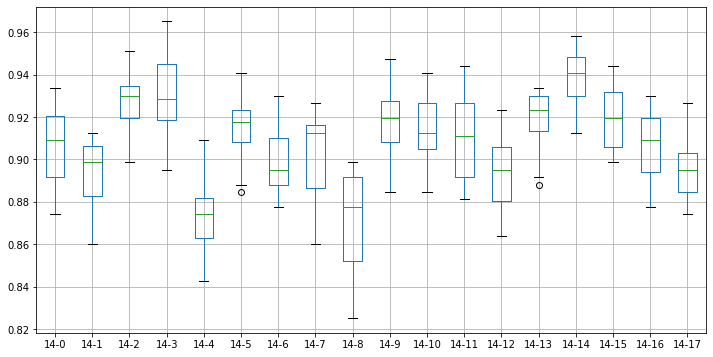

In [4]:
knn_com_dwt_df.boxplot(figsize=(12, 6))
knn_com_dwt_df.describe().transpose().sort_values(by='mean', ascending=False)

## `SVC`

Para o `SVC` com este dataframe, o classificador obteve melhor resultado com o canal **6**

In [5]:
svc_com_dwt_df = pd.DataFrame()

for channel_number, channel_columns in enumerate(canais_com_dwt_agrupados_por_numero):
    channel_acc = []

    if channel_number != 6:
        colunas = channel_columns + canais_com_dwt_agrupados_por_numero[6]
    else:
        colunas = canais_com_dwt_agrupados_por_numero[6]

    # X recebe apenas as colunas relacionadas ao canal respectivo à iteração
    X = chb12_com_dwt_df[colunas].values
    
    for seed in seed_array:
        # Separando dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Pré-processando dados
        std_scaler = StandardScaler().fit(X_pre_train)

        X_train = std_scaler.transform(X_pre_train)
        X_test = std_scaler.transform(X_pre_test)

        # Instanciando classificador
        classifier = SVC(cache_size=500).fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    svc_com_dwt_df[f'6-{channel_number}'] = channel_acc

svc_com_dwt_df

,6-0,6-1,6-2,6-3,6-4,6-5,6-6,6-7,6-8,6-9,6-10,6-11,6-12,6-13,6-14,6-15,6-16,6-17
0,0.986014,0.986014,0.979021,0.982517,0.979021,0.975524,0.975524,0.972028,0.968531,0.975524,0.972028,0.972028,0.982517,0.982517,0.968531,0.965035,0.975524,0.961538
1,0.972028,0.975524,0.965035,0.968531,0.958042,0.958042,0.954545,0.944056,0.965035,0.961538,0.958042,0.954545,0.968531,0.986014,0.979021,0.947552,0.954545,0.944056
2,0.979021,0.982517,0.989510,0.986014,0.975524,0.982517,0.975524,0.972028,0.989510,0.986014,0.975524,0.975524,0.982517,0.993007,0.982517,0.975524,0.979021,0.975524
3,0.972028,0.979021,0.982517,0.982517,0.965035,0.975524,0.965035,0.961538,0.958042,0.965035,0.968531,0.975524,0.972028,0.989510,0.989510,0.965035,0.982517,0.961538
4,0.972028,0.958042,0.961538,0.975524,0.965035,0.954545,0.954545,0.965035,0.968531,0.968531,0.961538,0.958042,0.951049,0.975524,0.975524,0.951049,0.940559,0.937063
5,0.975524,0.975524,0.975524,0.972028,0.965035,0.975524,0.968531,0.975524,0.972028,0.986014,0.993007,0.982517,0.982517,0.975524,0.993007,0.975524,0.982517,0.975524
6,0.968531,0.972028,0.965035,0.958042,0.965035,0.965035,0.954545,0.954545,0.965035,0.968531,0.965035,0.951049,0.972028,0.982517,0.975524,0.968531,0.961538,0.958042
7,0.975524,0.975524,0.965035,0.975524,0.965035,0.944056,0.958042,0.965035,0.979021,0.958042,0.968531,0.958042,0.972028,0.975524,0.972028,0.954545,0.951049,0.961538
8,0.979021,0.979021,0.986014,0.979021,0.979021,0.972028,0.968531,0.972028,0.965035,0.968531,0.958042,0.965035,0.979021,0.986014,0.993007,0.979021,0.968531,0.982517
9,0.975524,0.979021,0.954545,0.968531,0.965035,0.968531,0.961538,0.965035,0.965035,0.968531,0.968531,0.965035,0.975524,0.986014,0.979021,0.965035,0.961538,0.958042


,count,mean,std,min,25%,50%,75%,max
6-13,20.0,0.984091,0.006661,0.972028,0.979021,0.984266,0.989510,0.996503
6-14,20.0,0.981818,0.007744,0.968531,0.975524,0.980769,0.989510,0.993007
6-1,20.0,0.976748,0.007463,0.958042,0.972028,0.977273,0.982517,0.989510
6-3,20.0,0.974476,0.009082,0.958042,0.968531,0.975524,0.979895,0.989510
6-0,20.0,0.974126,0.005938,0.965035,0.968531,0.973776,0.979021,0.986014
6-12,20.0,0.974126,0.008595,0.951049,0.971154,0.973776,0.982517,0.986014
6-8,20.0,0.972028,0.008413,0.958042,0.965035,0.970280,0.979021,0.989510
6-9,20.0,0.971853,0.008894,0.958042,0.967657,0.970280,0.976399,0.986014
6-2,20.0,0.971853,0.009523,0.954545,0.965035,0.972028,0.979021,0.989510
6-10,20.0,0.970979,0.010648,0.954545,0.964161,0.970280,0.976399,0.993007


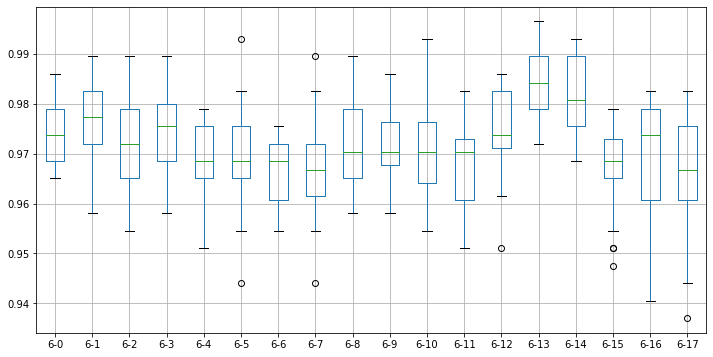

In [6]:
svc_com_dwt_df.boxplot(figsize=(12, 6))
svc_com_dwt_df.describe().transpose().sort_values(by='mean', ascending=False)